In [1]:
library('tidyverse')

options(repr.plot.width = 4, repr.plot.height = 3, repr.plot.res = 300)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# Strings

In [2]:
this_is_a_string = 'something'

this_is_a_string

[1] "something"

# Numbers

In [3]:
this_is_a_number = 12

this_is_a_number

[1] 12

# Booleans

In [4]:
this_is_a_boolean = TRUE

this_is_a_boolean

[1] TRUE

# Vectors

In [5]:
a = 'a'

In [6]:
print(a)

[1] "a"


### 🚨`c` is a function 🚨

In [7]:
b = c('a', 'b')

In [8]:
print(b)

[1] "a" "b"


# Data Frames and Tibbles

```
Tibble (or Data Frame)
    Vectors
        Strings/Numbers/Booleans
```

In [9]:
this_is_a_tibble = tibble(
    col_number = c(1, 2, 3),
    col_string = c('a', 'b', 'c'),
    col_boolean = c(TRUE, TRUE, FALSE)
)

this_is_a_tibble  # try with data.frame

col_number,col_string,col_boolean
<dbl>,<chr>,<lgl>
1,a,TRUE
2,b,TRUE
3,c,FALSE


# Factors

In [10]:
b = c('a', 'b', 'b')

In [11]:
print(b)

[1] "a" "b" "b"


In [12]:
b_factor = factor(b)

b_factor

[1] a b b
Levels: a b

In [13]:
sort(b_factor)

[1] a b b
Levels: a b

In [14]:
b_factor2 = factor(b, levels = c('b', 'a'))

b_factor2

[1] a b b
Levels: b a

What's going to happen here 👇?

In [15]:
# sort(b_factor2)

How can we use this for visualization?

In [16]:
as.numeric(b_factor)

[1] 1 2 2

# `read.csv`

In [17]:
df = read.csv(
    'https://raw.githubusercontent.com/chuckpr/BIOS512/main/in-class-exercises/data/marathon.csv'
)

In [18]:
df %>% head

,year,name,country,time,race.time,MF,country.simple
,<int>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>
1,2019,Lawrence Cherono,Kenya,2H 7M 57S,2.132500,Men's,Kenya
2,2018,Yuki Kawauchi,Japan,2H 15M 58S,2.266111,Men's,Japan
3,2017,Geoffrey Kirui,Kenya,2H 9M 37S,2.160278,Men's,Kenya
4,2016,Lemi Berhanu,Ethiopia,2H 12M 45S,2.212500,Men's,Ethiopia
5,2015,Lelisa Desisa,Ethiopia,2H 9M 17S,2.154722,Men's,Ethiopia
6,2014,"Mebrahtom ""Meb"" Keflezighi",United States,2H 8M 37S,2.143611,Men's,United States


In [19]:
# levels(df$name)

`stringsAsFactors = FALSE`

In [20]:
df = read.csv(
    'https://raw.githubusercontent.com/chuckpr/BIOS512/main/in-class-exercises/data/marathon.csv',
    stringsAsFactors = FALSE
)

In [21]:
df %>% head

,year,name,country,time,race.time,MF,country.simple
,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
1,2019,Lawrence Cherono,Kenya,2H 7M 57S,2.132500,Men's,Kenya
2,2018,Yuki Kawauchi,Japan,2H 15M 58S,2.266111,Men's,Japan
3,2017,Geoffrey Kirui,Kenya,2H 9M 37S,2.160278,Men's,Kenya
4,2016,Lemi Berhanu,Ethiopia,2H 12M 45S,2.212500,Men's,Ethiopia
5,2015,Lelisa Desisa,Ethiopia,2H 9M 17S,2.154722,Men's,Ethiopia
6,2014,"Mebrahtom ""Meb"" Keflezighi",United States,2H 8M 37S,2.143611,Men's,United States


# `read_csv`

In [22]:
df = read_csv(
    'https://raw.githubusercontent.com/chuckpr/BIOS512/main/in-class-exercises/data/marathon.csv'
)

Parsed with column specification:
cols(
  year = col_double(),
  name = col_character(),
  country = col_character(),
  time = col_character(),
  race.time = col_double(),
  MF = col_character(),
  country.simple = col_character()
)



In [23]:
col_types = cols(
  year = col_double(),
  name = col_character(),
  country = col_character(),
  time = col_character(),
  race.time = col_double(),
  MF = col_character(),
  country.simple = col_character()
)

df = read_csv(
    'https://raw.githubusercontent.com/chuckpr/BIOS512/main/in-class-exercises/data/marathon.csv',
    col_types = col_types
)

In [24]:
df %>% print

# A tibble: 171 x 7
    year name                 country     time    race.time MF    country.simple
   <dbl> <chr>                <chr>       <chr>       <dbl> <chr> <chr>         
 1  2019 "Lawrence Cherono"   Kenya       2H 7M …      2.13 Men's Kenya         
 2  2018 "Yuki Kawauchi"      Japan       2H 15M…      2.27 Men's Japan         
 3  2017 "Geoffrey Kirui"     Kenya       2H 9M …      2.16 Men's Kenya         
 4  2016 "Lemi Berhanu"       Ethiopia    2H 12M…      2.21 Men's Ethiopia      
 5  2015 "Lelisa Desisa"      Ethiopia    2H 9M …      2.15 Men's Ethiopia      
 6  2014 "Mebrahtom \"Meb\" … United Sta… 2H 8M …      2.14 Men's United States 
 7  2013 "Lelisa Desisa"      Ethiopia    2H 10M…      2.17 Men's Ethiopia      
 8  2012 "Wesley Korir"       Kenya       2H 12M…      2.21 Men's Kenya         
 9  2011 "Geoffrey Mutai"     Kenya       2H 3M …      2.05 Men's Kenya         
10  2010 "Robert Kiprono Che… Kenya       2H 5M …      2.10 Men's Kenya         
# … with

# forcats

In [25]:
# ?forcats

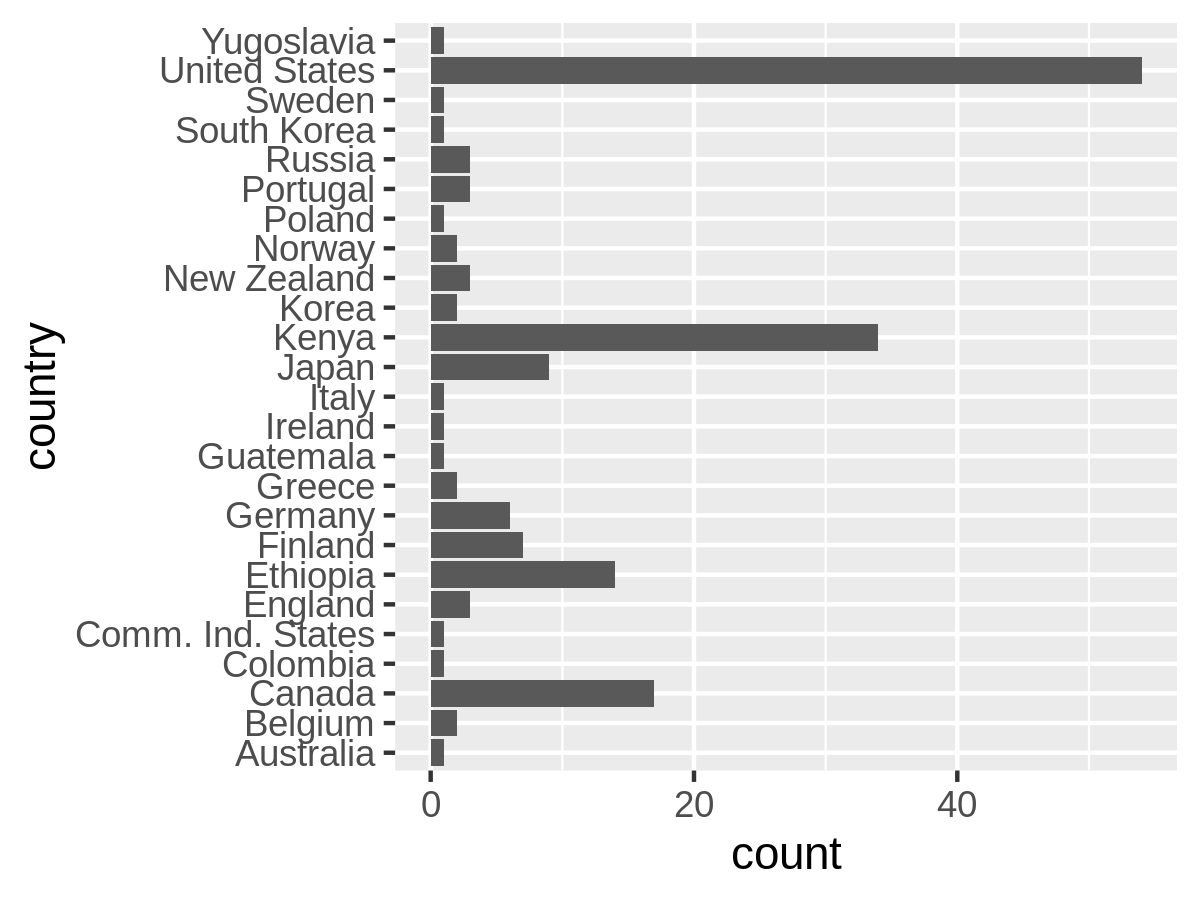

In [26]:
p = ggplot(df, aes(y = country))

p = p + geom_bar()

p

## Order by frequency

## fct_infreq

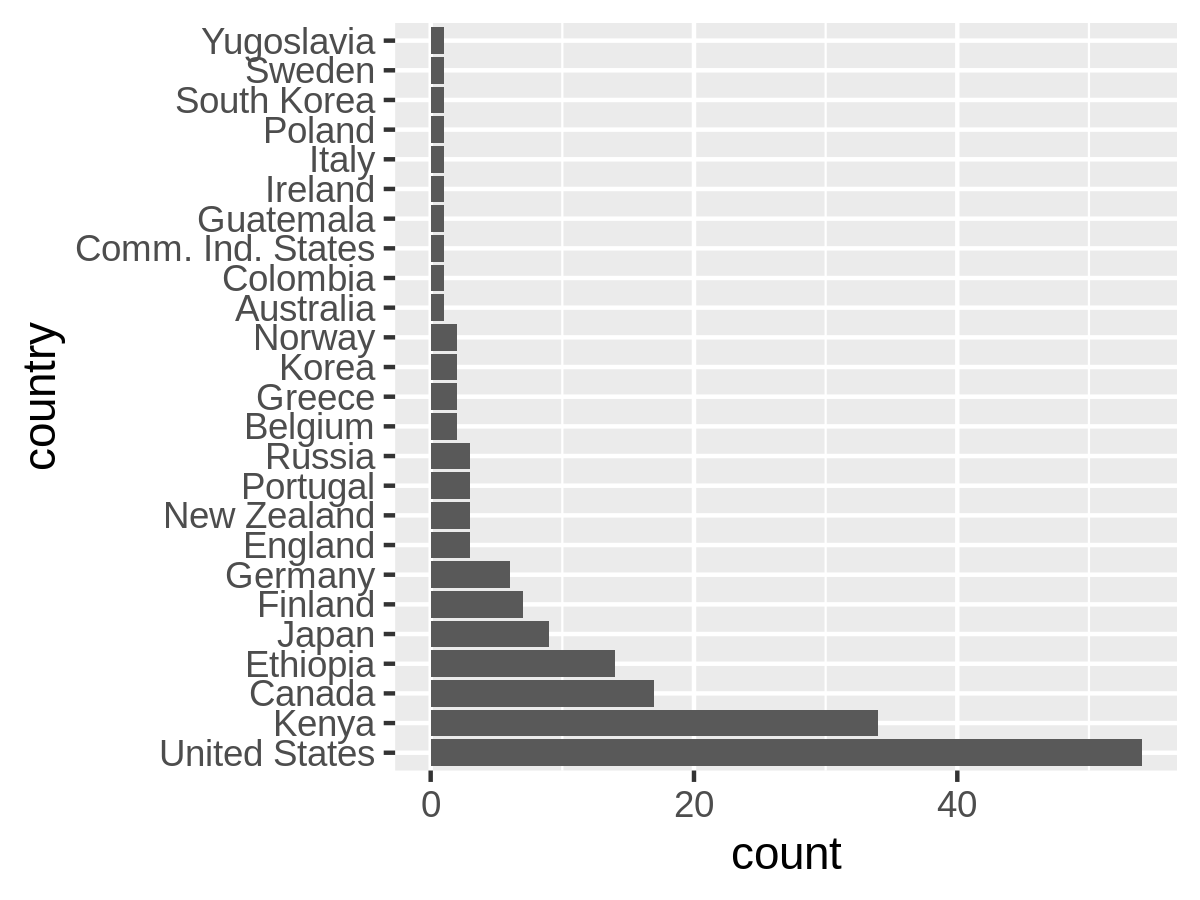

In [27]:
df.sorted = df %>%
    mutate(country = country %>% fct_infreq())  # try with fct_rev

p = ggplot(df.sorted, aes(x = country))

p = p + geom_bar() + coord_flip()

p

## Order by count

## fct_reorder

In [28]:
# Let's make a "geom_col" chart from the marathon data where the country column is already "counted"

## Lump low frequency categories

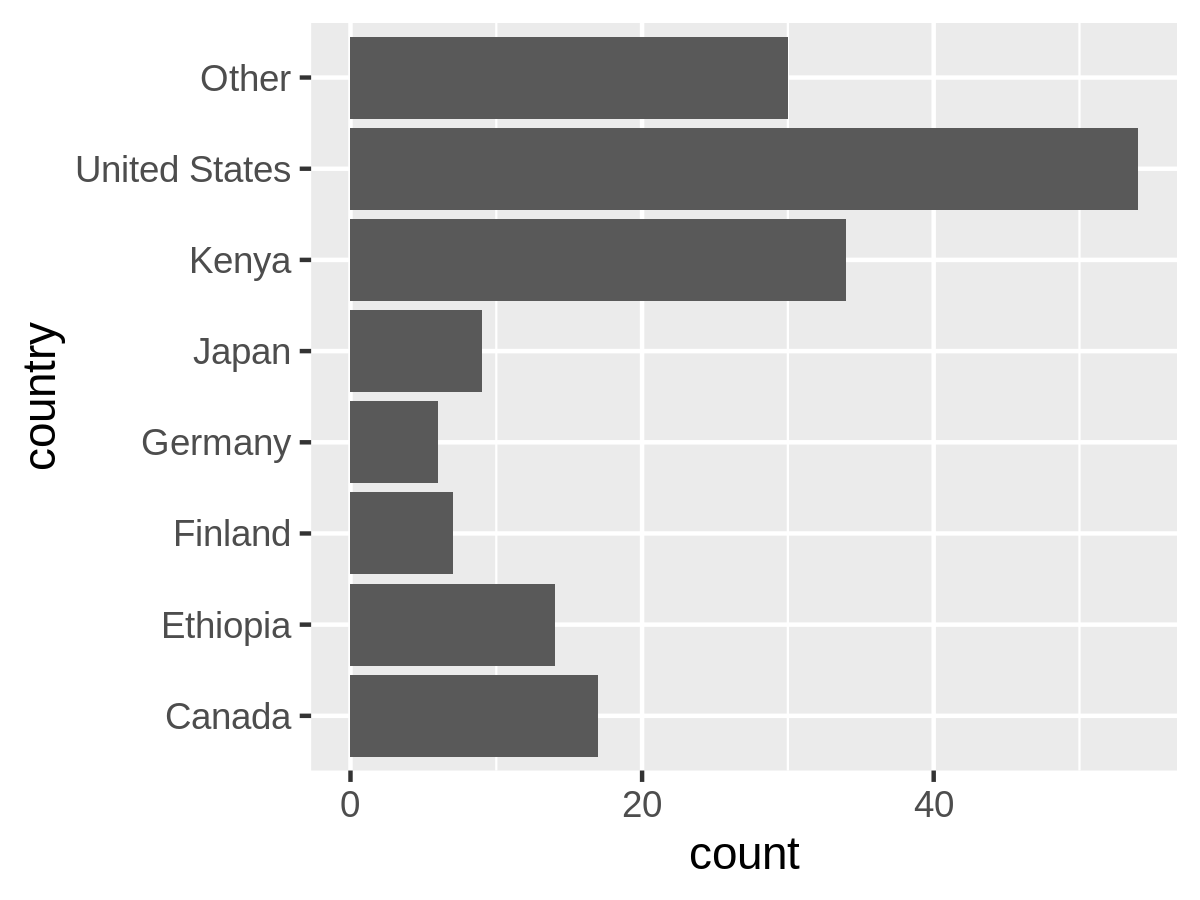

In [29]:
df.sorted = df %>%
    mutate(country = country %>% fct_lump(n = 7)) # add fct_infreq and fct_rev

p = ggplot(df.sorted, aes(y = country))

p = p + geom_bar()

p

## Order by an aggregate value

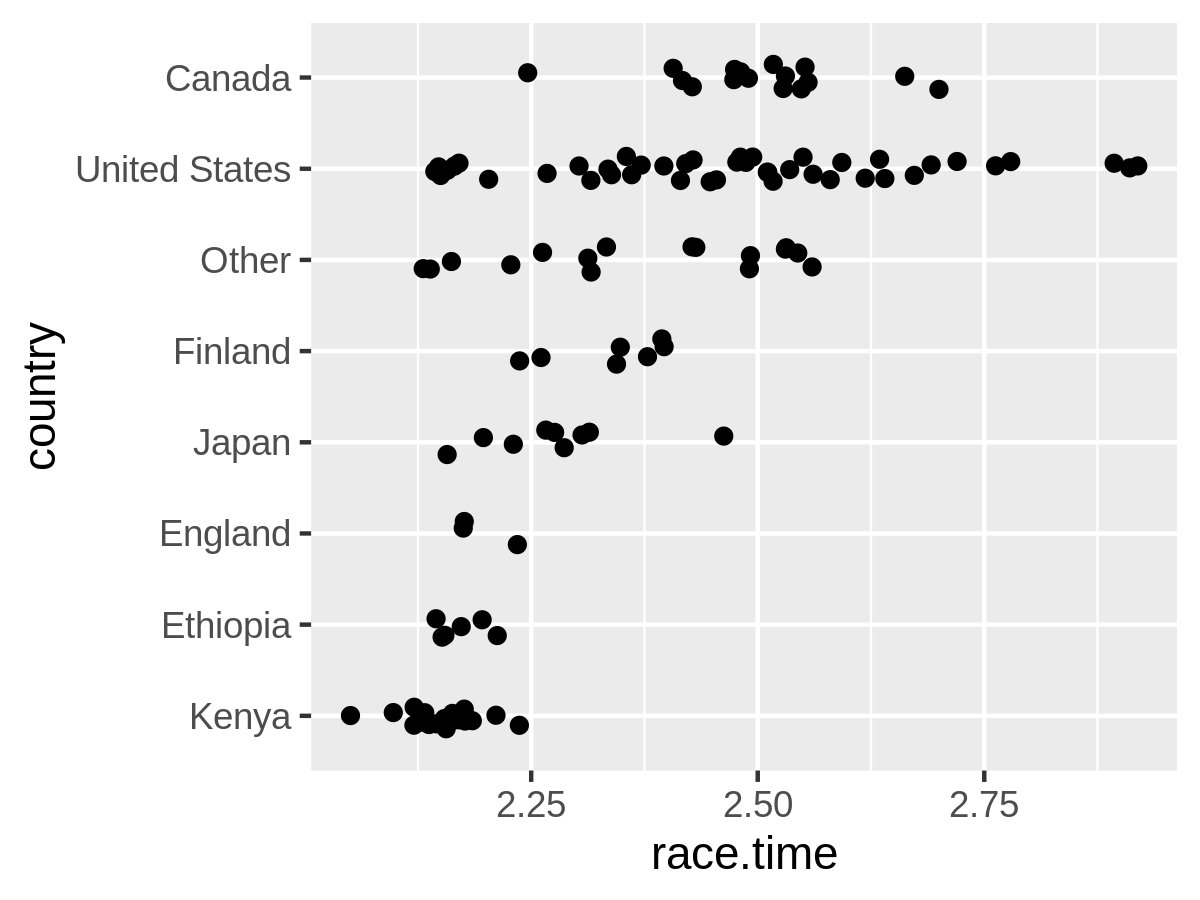

In [30]:
df.sorted = df %>%
    filter(MF == "Men's") %>%
    mutate(country = country %>% fct_lump(n = 7)) %>%
    mutate(country = country %>% fct_reorder(race.time, median)) # can we force "Other" to be last (hint fct_relevel)

p = ggplot(df.sorted, aes(x = country, y = race.time))

p = p + geom_point(position = position_jitter(h = 0, w = 0.15)) + coord_flip()

p